/home/cas/work/Projects/ML_predict_target_board_RGB_LED_state-ESP32-S3_CircuitPython/03_pc_linux_software/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 1.00
Classification Report:
                precision    recall  f1-score   support

   0    0    0       1.00      1.00      1.00       186
   0    0  195       1.00      1.00      1.00       172
   0  225    0       1.00      1.00      1.00       158
   0  225  195       1.00      1.00      1.00       162
 255    0    0       1.00      1.00      1.00       177
 255    0  195       1.00      1.00      1.00       158
 255  225    0       1.00      1.00      1.00       168
 255  225  195       1.00      1.00      1.00       159

      accuracy                           1.00      1340
     macro avg       1.00      1.00      1.00      1340
  weighted avg       1.00      1.00      1.00      1340



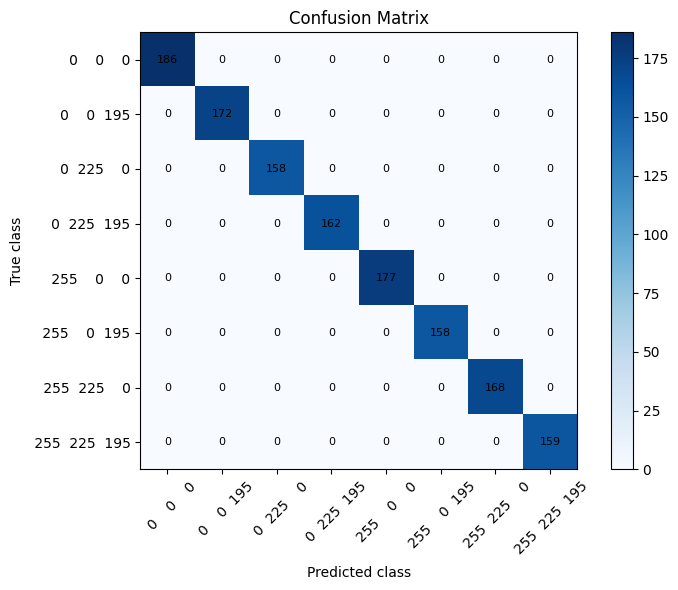

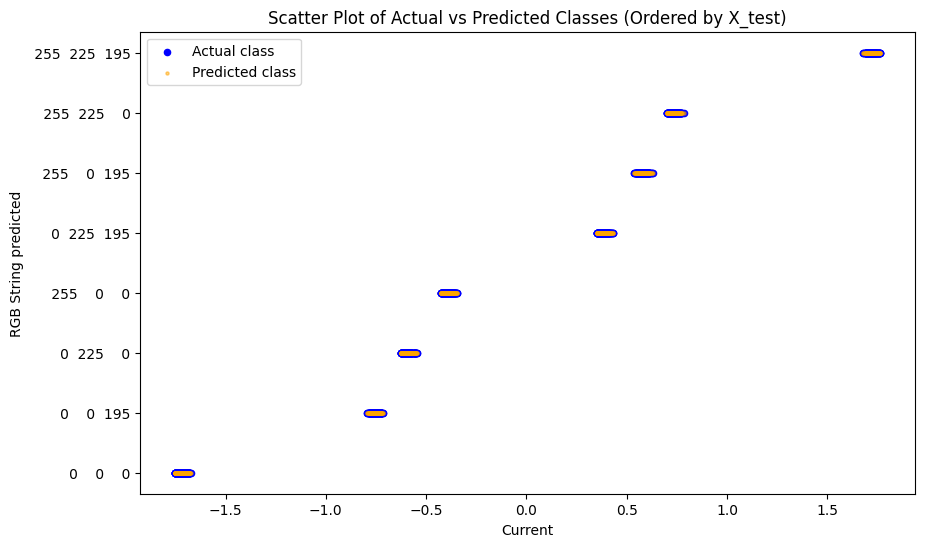

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def sort_lists(x, y):
  # Create a list of tuples to combine data and sorting key
  data_list = list(zip(x, y))
  sorted_data = sorted(data_list, key=lambda x: x[0])  # Sort by first element (x_data)

  # Unpack the sorted data
  x, y = zip(*sorted_data)
  
  return x, y

# Read the data file
df = pd.read_csv("./labeled_dataset_2024.05.24-03h39m42s-rgb_combinations_labeled_ordered.csv", sep=',')

# Create separate lists for current and RGB values
x = df[['current']].values.reshape(-1, 1)
y = df['   R    G    B']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train, y_train = sort_lists(X_train, y_train)
X_test, y_test = sort_lists(X_test, y_test)

# print('X_train, y_train')
# print(X_train)
# print()
# print(y_train)
# print()

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Initialize the MLPClassifier with one hidden layer and set the number of classes as the output layer size
# mlp = MLPClassifier(hidden_layer_sizes=(5), max_iter=1000, random_state=42, solver='lbfgs', activation='relu')
# mlp = MLPClassifier(hidden_layer_sizes=(2), max_iter=1000, random_state=42, solver='adam', activation='relu')

# THE BEST: 1 node only!! solver='adam', activation='identity'
# note: without Standardize the features, would be 12 nodes!!
mlp = MLPClassifier(hidden_layer_sizes=(1), max_iter=1000, random_state=42, solver='adam', activation='identity')

# solver='sgd'
## activation='relu' or 'identity', gives the same result
# mlp = MLPClassifier(hidden_layer_sizes=(2), max_iter=1000, random_state=42, solver='sgd', activation='relu')
# mlp = MLPClassifier(hidden_layer_sizes=(2), max_iter=1000, random_state=42, solver='sgd', activation='identity')

# Train the model
mlp.fit(X_train, y_train)
mlp_global = mlp

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))

# Add labels and title
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion Matrix')

# Add text with counts on confusion matrix
for i in range(len(cm)):
    for j in range(len(cm[i])):
        plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

# Scatter plot for actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, s=20, label='Actual class', color='blue')
plt.scatter(X_test, y_pred, s=5, label='Predicted class', color='orange', alpha=0.5)
plt.xlabel('Current')
plt.ylabel('RGB String predicted')
plt.title('Scatter Plot of Actual vs Predicted Classes (Ordered by X_test)')
plt.legend()
plt.show()

def encode_float32(value):
  # Example using string formatting with f-string and desired precision
  value = float(f'{value:.7f}')
  print(value)
  return value  # Adjust ".7f" for desired number of decimal places

# Extract the weights and biases from the trained model
weights = mlp.coefs_
biases = mlp.intercepts_

weights_global = weights.copy()
biases_global = biases.copy()

def float_to_float16(value):
  """Converts a float value to a float16 representation (simulated).
np.expand_dims(biases[layer_index], axis=0)
  Since Python doesn't directly support float16 data type, this function
  demonstrates a simulated conversion using bit manipulation or libraries
  like `struct` (not recommended for production due to platform dependence).
  """

  # Replace this with actual float16 conversion logic (e.g., using libraries)
  # This is for demonstration purposes only
  return f"{value:.4e}"  # Limit to 4 digits for demonstration

# print(f'weights: \n{weights}\n')
# print(f'biases: \n{biases}\n')

# for layer in weights:
#   np.round(layer, decimals=3, out=layer)  # Round in-place

# for layer in biases:
#   np.round(layer, decimals=3, out=layer)  # Round in-place
  
# print(f'weights: \n{weights}\n')
# print(f'biases: \n{biases}\n')

# for i, layer in enumerate(weights):
#   l = layer.astype('float')
#   print(l)
#   np.save(f'weights_{i}.npy', l)  # Use f-string for unique filenames

# for i, layer in enumerate(biases):
#   l = layer.astype('float')
#   print(l)
#   np.save(f'biases{i}.npy', l)  # Use f-string for unique filenames


# Save the classifier
import pickle
with open('classifier_nn.pkl', 'wb') as f:
    pickle.dump(mlp, f)

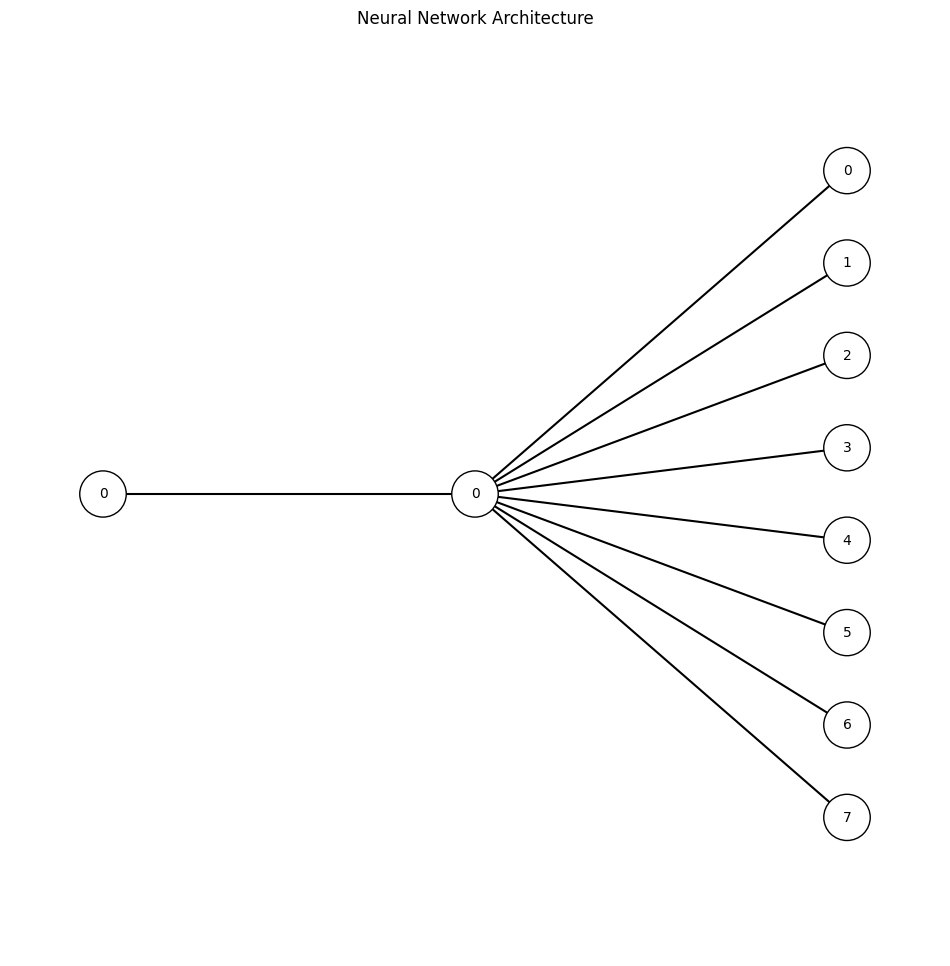

In [26]:
import matplotlib.pyplot as plt
import networkx as nx
import pickle
from sklearn.neural_network import MLPClassifier

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotlib.
    
    :param ax: matplotlib.axes.Axes, the axes on which to plot the cartoon (get e.g. by plt.gca())
    :param left: float, the center of the leftmost node(s) will be placed here
    :param right: float, the center of the rightmost node(s) will be placed here
    :param bottom: float, the center of the bottommost node(s) will be placed here
    :param top: float, the center of the topmost node(s) will be placed here
    :param layer_sizes: list of int, list containing the number of nodes in each layer
    '''
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
            # Annotation for nodes
            ax.text(n*h_spacing + left, layer_top - m*v_spacing, '{}'.format(m), ha='center', va='center', zorder=5)

    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

# Load the classifier
with open('classifier_nn.pkl', 'rb') as f:
    clf = pickle.load(f)

# Define the architecture of the network
if isinstance(clf.hidden_layer_sizes, int):
    layer_sizes = [clf.n_features_in_] + [clf.hidden_layer_sizes] + [clf.n_outputs_]
else:
    layer_sizes = [clf.n_features_in_] + list(clf.hidden_layer_sizes) + [clf.n_outputs_]

# Plot the neural network
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes)
plt.title('Neural Network Architecture')
plt.show()

In [27]:
import numpy as np
import json

weights = []
biases = []

# with open('data.json', 'r') as f:
#   model_data = json.load(f)

# weights = []
# biases = []
# for key, value in model_data.items():
#   if key.endswith("_weights"):
#     weights.append(np.array(value))  # Convert nested list back to NumPy array
#   elif kescaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)y.endswith("_bias"):
#     biases.append(np.array(value))  # Convert nested list back to NumPy array
#   else:
#     print(f"Ignoring unknown key: {key}")  # Handle unexpected keys (optional)
    
# weights = np.load('weights.npy')
# biases = np.load('biases.npy')

# Assuming weights were saved as weights_0.npy, weights_1.npy, etc.

# for i in range(2):  # Adjust path as needed
#   weights.append(np.load(f'./weights_{i}.npy'))
  
# for i in range(2):  # Adjust path as needed
#   biases.append(np.load(f'./biases_{i}.npy'))
  
# print()
# l = []
# l.append(np.load(f'./weights_0.npy', allow_pickle=True).astype('float'))  # Allow pickling and convert to float16
# l.append(np.load(f'./weights_1.npy', allow_pickle=True).astype('float'))  # Allow pickling and convert to float16
# weights = l.copy()
# print(weights)
# print()
# print()
# l = []
# l.append(np.load(f'./biases_0.npy', allow_pickle=True))  # Allow pickling and convert to float16
# l.append(np.load(f'./biases_1.npy', allow_pickle=True))  # Allow pickling and convert to float16
# biases = l.copy()
# print(biases)


# print(f'weights: \n{weights}\n')
# print(f'biases: \n{biases}\n')

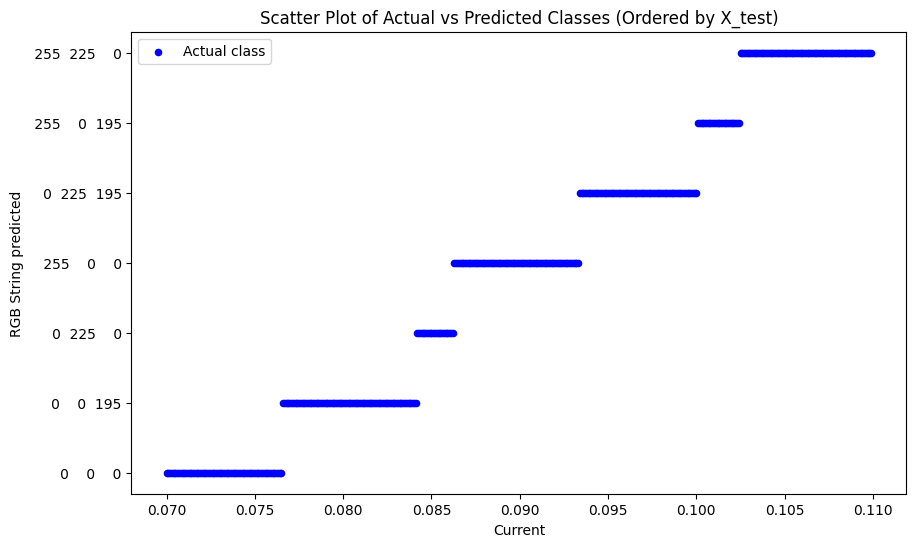

In [28]:
import numpy as np

def convert_ndarrays_to_strings(data):
  """
  Converts NumPy arrays within a list to strings.

  Args:
      data: A list that may contain NumPy arrays.

  Returns:
      A new list with NumPy arrays converted to strings.
  """
  if isinstance(data, np.ndarray):
    return str(data)  # Convert NumPy array to string
  elif isinstance(data, list):
    return [convert_ndarrays_to_strings(item) for item in data]
  else:
    return data  # No conversion for non-list or non-ndarray types

x = []
y = []
for i in range(700, 1100):
    value = i/10000.0
    v = scaler.transform([[value]])
    x.append(value)
    y.append(mlp_global.predict(np.array(v)))
    
y = convert_ndarrays_to_strings(y)
y = [string[string.find("'") + 1:-2] for string in y]
    
# Scatter plot for actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=20, label='Actual class', color='blue')
plt.xlabel('Current')
plt.ylabel('RGB String predicted')
plt.title('Scatter Plot of Actual vs Predicted Classes (Ordered by X_test)')
plt.legend()
plt.show()

[0.07, 0.0701, 0.0702, 0.0703, 0.0704, 0.0705, 0.0706, 0.0707, 0.0708, 0.0709, 0.071, 0.0711, 0.0712, 0.0713, 0.0714, 0.0715, 0.0716, 0.0717, 0.0718, 0.0719, 0.072, 0.0721, 0.0722, 0.0723, 0.0724, 0.0725, 0.0726, 0.0727, 0.0728, 0.0729, 0.073, 0.0731, 0.0732, 0.0733, 0.0734, 0.0735, 0.0736, 0.0737, 0.0738, 0.0739, 0.074, 0.0741, 0.0742, 0.0743, 0.0744, 0.0745, 0.0746, 0.0747, 0.0748, 0.0749, 0.075, 0.0751, 0.0752, 0.0753, 0.0754, 0.0755, 0.0756, 0.0757, 0.0758, 0.0759, 0.076, 0.0761, 0.0762, 0.0763, 0.0764, 0.0765, 0.0766, 0.0767, 0.0768, 0.0769, 0.077, 0.0771, 0.0772, 0.0773, 0.0774, 0.0775, 0.0776, 0.0777, 0.0778, 0.0779, 0.078, 0.0781, 0.0782, 0.0783, 0.0784, 0.0785, 0.0786, 0.0787, 0.0788, 0.0789, 0.079, 0.0791, 0.0792, 0.0793, 0.0794, 0.0795, 0.0796, 0.0797, 0.0798, 0.0799, 0.08, 0.0801, 0.0802, 0.0803, 0.0804, 0.0805, 0.0806, 0.0807, 0.0808, 0.0809, 0.081, 0.0811, 0.0812, 0.0813, 0.0814, 0.0815, 0.0816, 0.0817, 0.0818, 0.0819, 0.082, 0.0821, 0.0822, 0.0823, 0.0824, 0.0825, 0.0826

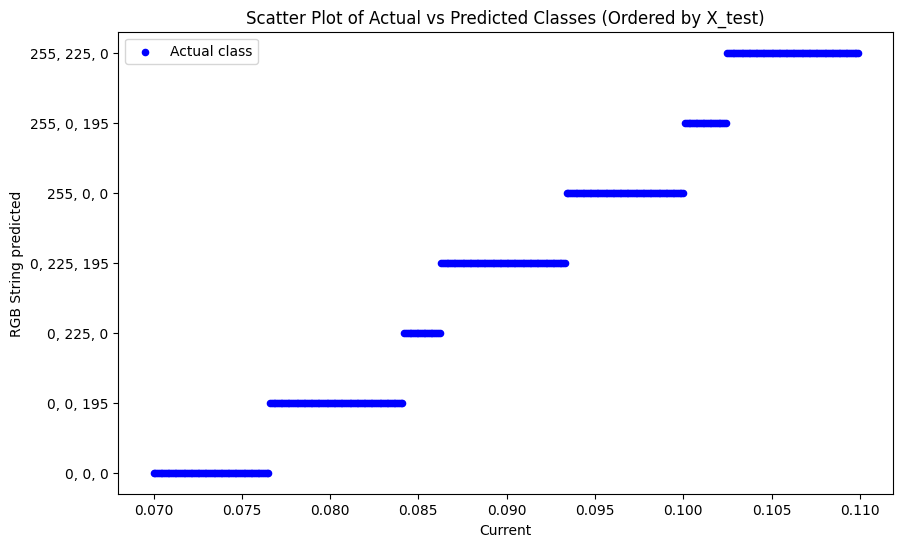

In [29]:
classes = [
    [   0,   0,   0], # 0.069850
    [   0,   0, 195], # 0.083289
    [   0, 225,   0], # 0.085641
    [ 255,   0,   0], # 0.088599
    [   0, 225, 195], # 0.099266
    [ 255,   0, 195], # 0.101828
    [ 255, 225,   0], # 0.104111
    [ 255, 225, 195]  # 0.117829
]

import sys
sys.path.append('./')  # Add the directory to the path (if needed)
import mlp_custom
classifier = mlp_custom.MLP(weights_global, biases_global, classes)
    
x = []
y = []
for i in range(700, 1100):
    value = i/10000.0
    v = scaler.transform([[value]])
    x.append(value)
    y.append(classifier.predict(np.array(v)))
    
y = [", ".join(map(str, inner_list)) for inner_list in y]

print(x)
print(y)
    
# Scatter plot for actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=20, label='Actual class', color='blue')
plt.xlabel('Current')
plt.ylabel('RGB String predicted')
plt.title('Scatter Plot of Actual vs Predicted Classes (Ordered by X_test)')
plt.legend()
plt.show()

In [30]:
import numpy as np

def convert_ndarrays_to_strings(data):
  """
  Converts NumPy arrays within a list to strings.

  Args:
      data: A list that may contain NumPy arrays.

  Returns:
      A new list with NumPy arrays converted to strings.
  """
  if isinstance(data, np.ndarray):
    return str(data)  # Convert NumPy array to string
  elif isinstance(data, list):
    return [convert_ndarrays_to_strings(item) for item in data]
  else:
    return data  # No conversion for non-list or non-ndarray types

# Sample data with NumPy arrays
data = [np.array([1, 2, 3]), np.array(['apple', 'banana']), 42, np.array([3.14, 2.7])]

# Convert NumPy arrays to strings
converted_data = convert_ndarrays_to_strings(y)

print(converted_data)


['0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 0', '0, 0, 195', '0, 0, 195', '0, 0, 195', '0, 0, 195', '0, 0, 195', '0, 0, 195', '0, 0, 195', '0, 0, 195', '0, 0, 195', '0, 0, 195', '0, 0, 195', '0, 0, 195', '0, 0, 195', '0, 0, 195', '0, 0, 195', '0, 0, 195', '0, 0, 195', '0, 0, 195', '0, 0, 195', '0, 0, 195', '0, 0, 195', 

<class 'list'>


/home/cas/work/Projects/ML_predict_target_board_RGB_LED_state-ESP32-S3_CircuitPython/03_pc_linux_software/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy: 1.00
Classification Report:
                precision    recall  f1-score   support

   0    0    0       1.00      1.00      1.00       186
   0    0  195       1.00      1.00      1.00       172
   0  225    0       1.00      1.00      1.00       158
   0  225  195       1.00      1.00      1.00       162
 255    0    0       1.00      1.00      1.00       177
 255    0  195       1.00      1.00      1.00       158
 255  225    0       1.00      1.00      1.00       168
 255  225  195       1.00      1.00      1.00       159

      accuracy                           1.00      1340
     macro avg       1.00      1.00      1.00      1340
  weighted avg       1.00      1.00      1.00      1340



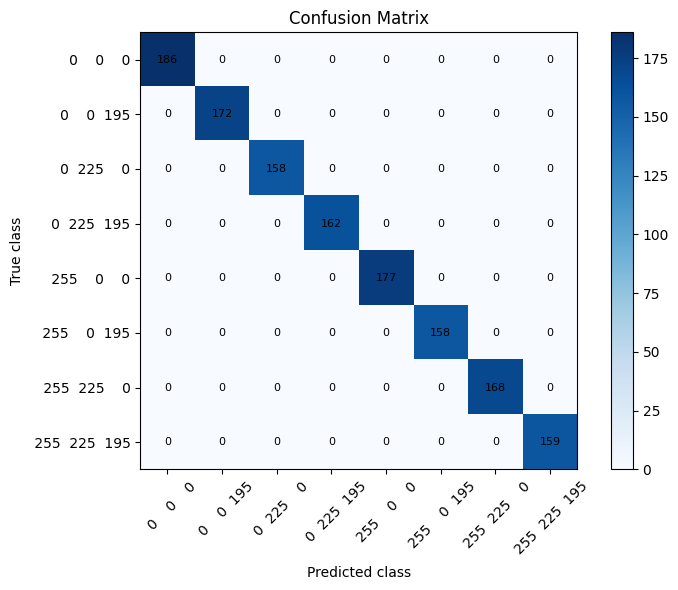

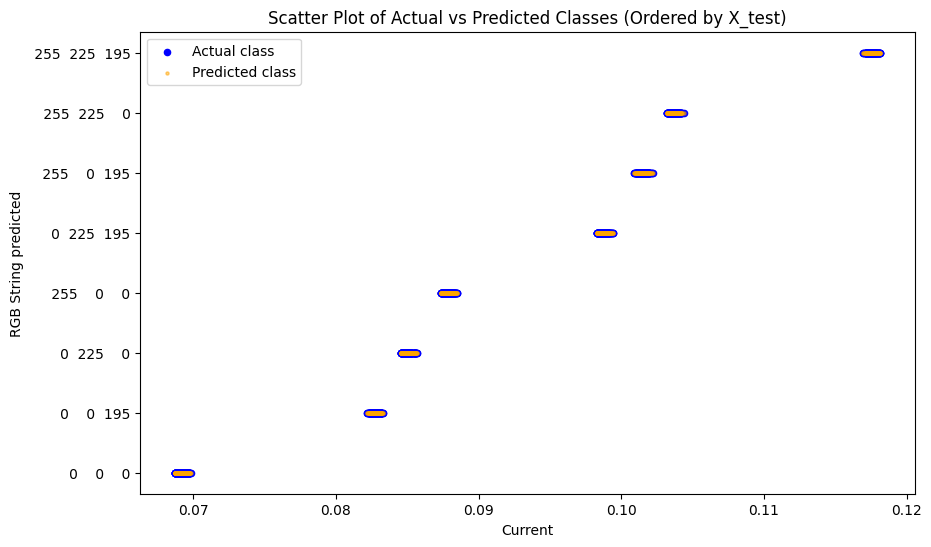

weights: 
[array([[ 4.18265376e+01, -1.88607370e+02,  2.97220883e+02,
         1.68546855e-01,  1.28919994e+02, -3.29746726e+02,
        -7.54964137e-01]]), array([[-4.10897300e-01, -4.08857449e-01, -3.51251561e-01,
         3.19709276e-02,  1.03212085e+02,  4.58040416e+00,
         2.01991615e+01],
       [-4.65564498e-01, -2.68428362e-01,  1.29248498e-01,
        -5.67320595e-02, -4.40928596e+02, -5.92667922e-02,
        -4.87363524e+01],
       [ 1.19345935e-01, -5.85722580e-01, -5.59298976e-01,
        -4.25491425e-01, -2.32012550e+02,  9.71322952e+00,
         5.38620611e+00],
       [ 3.98270212e-01, -2.52325502e-01, -5.19573899e-01,
         2.37922041e-01, -7.72882100e-02, -4.88107026e-01,
        -6.22863019e-03],
       [-6.01299536e-01,  5.28604167e-01, -7.53963163e-01,
         2.09884375e-01,  3.03766507e+02,  6.37288925e+00,
         5.07141476e+01],
       [-4.06984961e-01,  6.06430536e-01,  3.48304052e+00,
         5.67577308e-01,  3.51990865e+02,  1.34142339e+01,
     

In [31]:
# Assuming y is a NumPy array of RGB color strings
print(type(y))  # Check the data typeimport pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def sort_lists(x, y):
  # Create a list of tuples to combine data and sorting key
  data_list = list(zip(x, y))
  sorted_data = sorted(data_list, key=lambda x: x[0])  # Sort by first element (x_data)

  # Unpack the sorted data
  x, y = zip(*sorted_data)
  
  return x, y

# Read the data file
df = pd.read_csv("./labeled_dataset_2024.05.24-03h39m42s-rgb_combinations_labeled_ordered.csv", sep=',')

# Create separate lists for current and RGB values
x = df[['current']].values.reshape(-1, 1)
y = df['   R    G    B']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train, y_train = sort_lists(X_train, y_train)
X_test, y_test = sort_lists(X_test, y_test)

# # Standardize the features (important for neural networks)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Initialize the MLPClassifier with one hidden layer and set the number of classes as the output layer size
mlp = MLPClassifier(hidden_layer_sizes=(7,7), max_iter=500, random_state=42, solver='lbfgs', activation='relu')

# Train the model
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))

# Add labels and title
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion Matrix')

# Add text with counts on confusion matrix
for i in range(len(cm)):
    for j in range(len(cm[i])):
        plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

# Scatter plot for actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, s=20, label='Actual class', color='blue')
plt.scatter(X_test, y_pred, s=5, label='Predicted class', color='orange', alpha=0.5)
plt.xlabel('Current')
plt.ylabel('RGB String predicted')
plt.title('Scatter Plot of Actual vs Predicted Classes (Ordered by X_test)')
plt.legend()
plt.show()

# Extract the weights and biases from the trained model
weights = mlp.coefs_
biases = mlp.intercepts_

# Convert ndarrays to lists within each list
weights_list = [[arr.tolist() for arr in layer] for layer in weights]
biases_list = [bias.tolist() for bias in biases]

# Open files for writing in JSON format
import json
with open("weights.json", "w") as f_weights, open("biases.json", "w") as f_biases:
  json.dump(weights_list, f_weights)
  json.dump(biases_list, f_biases)
    
print(f'weights: \n{weights}\n')
print(f'biases: \n{biases}\n')

# Save the classifier
import pickle
with open('classifier_nn.pkl', 'wb') as f:
    pickle.dump(mlp, f)

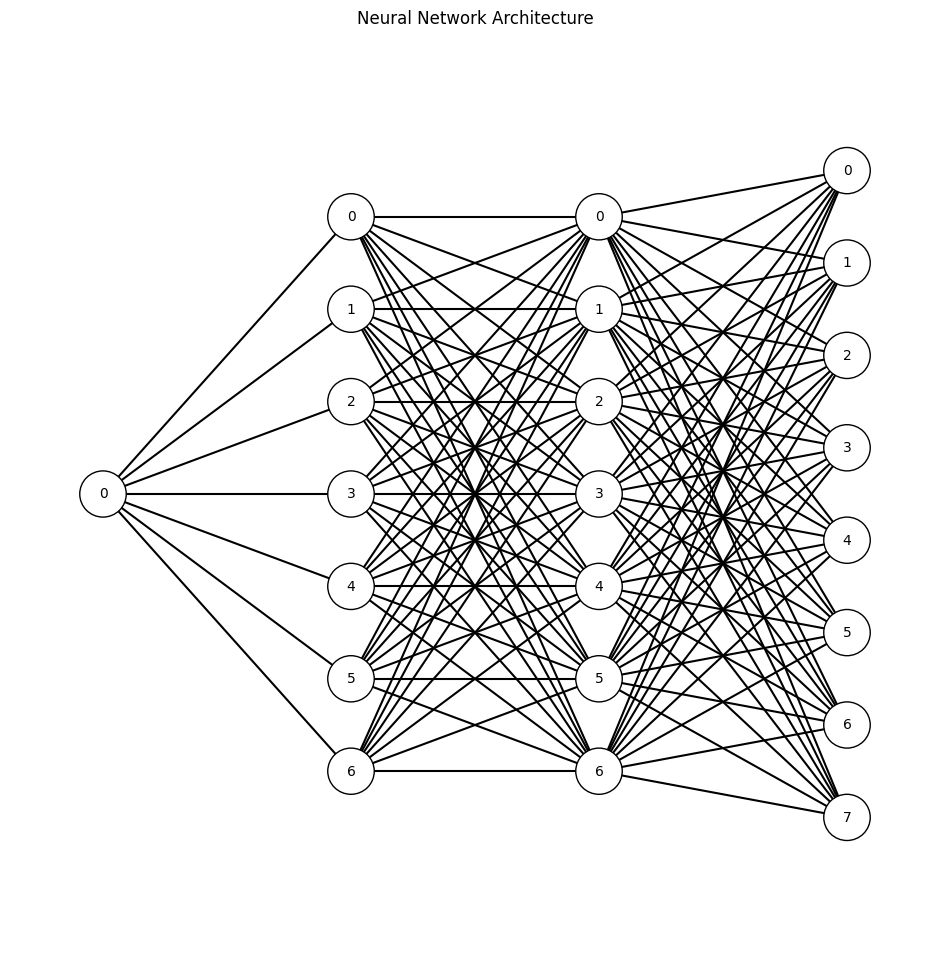

In [32]:
import matplotlib.pyplot as plt
import networkx as nx
import pickle
from sklearn.neural_network import MLPClassifier

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotlib.
    
    :param ax: matplotlib.axes.Axes, the axes on which to plot the cartoon (get e.g. by plt.gca())
    :param left: float, the center of the leftmost node(s) will be placed here
    :param right: float, the center of the rightmost node(s) will be placed here
    :param bottom: float, the center of the bottommost node(s) will be placed here
    :param top: float, the center of the topmost node(s) will be placed here
    :param layer_sizes: list of int, list containing the number of nodes in each layer
    '''
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
            # Annotation for nodes
            ax.text(n*h_spacing + left, layer_top - m*v_spacing, '{}'.format(m), ha='center', va='center', zorder=5)

    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

# Load the classifier
with open('classifier_nn.pkl', 'rb') as f:
    clf = pickle.load(f)

# Define the architecture of the network
if isinstance(clf.hidden_layer_sizes, int):
    layer_sizes = [clf.n_features_in_] + [clf.hidden_layer_sizes] + [clf.n_outputs_]
else:
    layer_sizes = [clf.n_features_in_] + list(clf.hidden_layer_sizes) + [clf.n_outputs_]

# Plot the neural network
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes)
plt.title('Neural Network Architecture')
plt.show()

In [33]:
import numpy as np
import json

# File paths for weights and biases
weights_file = "weights.json"
biases_file = "biases.json"

# Open JSON files and load data
with open(weights_file, "r") as f_weights, open(biases_file, "r") as f_biases:
  weights_list = json.load(f_weights)
  biases_list = json.load(f_biases)
  
# Convert nested lists to ndarrays (assuming they represent ndarrays)
weights = [[np.array(arr) for arr in layer] for layer in weights_list]

# Convert biases_list to ndarrays (assuming they represent ndarrays)
biases = [np.array(bias) for bias in biases_list]

print(f'weights: \n{weights}\n')
print(f'biases: \n{biases}\n')

weights: 
[[array([ 4.18265376e+01, -1.88607370e+02,  2.97220883e+02,  1.68546855e-01,
        1.28919994e+02, -3.29746726e+02, -7.54964137e-01])], [array([-4.10897300e-01, -4.08857449e-01, -3.51251561e-01,  3.19709276e-02,
        1.03212085e+02,  4.58040416e+00,  2.01991615e+01]), array([-4.65564498e-01, -2.68428362e-01,  1.29248498e-01, -5.67320595e-02,
       -4.40928596e+02, -5.92667922e-02, -4.87363524e+01]), array([ 1.19345935e-01, -5.85722580e-01, -5.59298976e-01, -4.25491425e-01,
       -2.32012550e+02,  9.71322952e+00,  5.38620611e+00]), array([ 0.39827021, -0.2523255 , -0.5195739 ,  0.23792204, -0.07728821,
       -0.48810703, -0.00622863]), array([-6.01299536e-01,  5.28604167e-01, -7.53963163e-01,  2.09884375e-01,
        3.03766507e+02,  6.37288925e+00,  5.07141476e+01]), array([ -0.40698496,   0.60643054,   3.48304052,   0.56757731,
       351.99086478,  13.41423395,  37.97118964]), array([-0.53142862, -0.39261352, -0.58730215, -0.22557174, -0.14376427,
       -0.29528422

In [34]:
# 0.069850	0
# 0.083289	1
# 0.085641	2
# 0.088599	3
# 0.099266	4
# 0.101828	5
# 0.104111	6
# 0.117829	7

input = 0.1 # output: 0

import sys
sys.path.append('./')  # Add the directory to the path (if needed)
import mlp_custom

clf = mlp_custom.MLP(weights, biases)
class_number = clf.predict(input)
print('Predicted class:', class_number)

TypeError: MLP.__init__() missing 1 required positional argument: 'classes'